# Machine Learning Basics
## Starting with Scikit-learn

In this notebook we will introduce the basics of `sklearn` application interface (API). 

This notebook accompanies **parts II** and **III** of the **Lecture 2**.

<img src="pictures/brain-volume.png" width = "150" style="float: right;"> 
## Regression

This example demonstrates the __regressor__ object API.

The file 'neonatal_brain_volumes.csv' contains gestational ages (GA) and brain volumes of premature babies. We will fit a `LinearRegression` model to predict the brain volumes from GA.

### Prepare the data
First we will import the file using the `pandas` package and check its content.

In [1]:
# import pandas package
import pandas as pd
# read file into a dataframe object
df = pd.read_csv('datasets/neonatal_brain_volumes.csv')
# print the first few lines
df.head()

,GA,brain volume
0,35.714,252.41
1,37.429,277.73
2,36.143,266.36
3,36.714,266.13
4,42.286,308.35


Next, we will convert the data into a numpy array and create a feature matrix containing the column 'GA' and the target vector containing brain volumes

In [2]:
import numpy as np
# convert dataframe object into a numpy array
data = df.to_numpy()
# Create the feature matrix and convert it to a 2D numpy array
X = data[:,0].reshape(-1,1)
print('Feature matrix X dimensions: ', X.shape)
print('Number of samples: ', X.shape[0])
print('Number of features: ', X.shape[1])
# Create the target vector
y = data[:,1]
print('Target vector y dimensions: ', y.shape)

Feature matrix X dimensions:  (162, 1)
Number of samples:  162
Number of features:  1
Target vector y dimensions:  (162,)


### Create the model
Now we select and create the linear regression model

In [3]:
# import LinearRegression model
from sklearn.linear_model import LinearRegression
# Create the model
model = LinearRegression()

### Fit the model
The next step is to fit the model to the training data

In [4]:
# Fit the model
model.fit(X,y)

LinearRegression()

We can view the coeficients of the linear model 
$y=w_0+w_1x$
which we fitted to the data as follows

In [5]:
w0=model.intercept_
print('w0: ', round(w0))
w1=model.coef_[0]
print('w1: ', round(w1))

w0:  -445.0
w1:  20.0


### Evaluate the model
The model can be evaluated by calling the function `score`. For regressors this function returns the $R^2$ score. 

In [6]:
# Calculate r2 score
r2 = model.score(X,y)
# Print the score
print('R2 score: ', round(r2,2))

R2 score:  0.84


### Predict on new data

We are interested in visualising the model, we will therefore create a grid that samples the feature space. The code bellow will create 10 samples that span the values between minimum and maximum of the GA. Note we need a 2D array for prediction.

In [7]:
X_model = np.linspace(np.min(X),np.max(X),10).reshape(-1,1)
print('Feature space:\n',np.around(X_model).T)

Feature space:
 [[29. 31. 33. 34. 36. 38. 40. 42. 43. 45.]]


We are now ready to predict the target values for these new samples

In [8]:
y_model = model.predict(X_model)
print('Predicted targets for the feature space:\n',np.around(y_model))

Predicted targets for the feature space:
 [124. 160. 195. 230. 265. 301. 336. 371. 406. 442.]


### Plot the result
We plot the result using `matplotlib` library

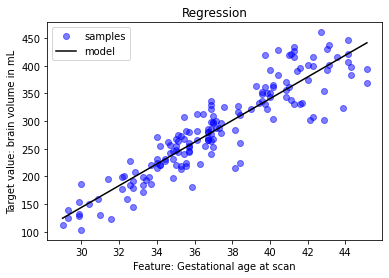

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 

# plot the data
plt.plot(X,y,'bo', alpha = 0.5, label = 'samples')

# plot the model
plt.plot(X_model,y_model,'k',label = 'model')

# Annotate the plot
plt.title('Regression')
plt.xlabel('Feature: Gestational age at scan')
plt.ylabel('Target value: brain volume in mL')
plt.legend()

### Exercise 1

It is now your turn to write the solution to a following problem: You would like to predict GA of a preterm baby from the measurement of the brain volume. Note that in this case the GA and volumes switched the roles - volume is a feature and GA is the target value. The feature matrix `X1` and target vector `y1` were created for you.

Write code to
* Create the `LinearRegression` model
* Fit the model 
* Calculate the $R^2$ score

Commands for printing out score and the equation of the fitted model were created for you.

In [10]:
# Create the feature matrix using brain volumes
X1 = data[:,1].reshape(-1,1)

# Create the target vector using GA
y1 = data[:,0]

# Create the model
model1 = LinearRegression()

# Fit the model
model1.fit(X1,y1)

# Calculate the R2 score
r2_1 = model1.score(X1,y1)

# Print the score
print('R2 score: ', round(r2_1,2))

# Print the equation of the fitted model
print('Fitted model: y={}+{}x'.format(round(model1.intercept_),round(model1.coef_[0],2)))

R2 score:  0.84
Fitted model: y=25.0+0.04x


## Classification
<img src="pictures/HeartSegmentation.gif" width = "150" style="float: right;">
 
This example demonstrates the __classifier__ object API.

The file 'heart_failure_data.csv' contains features Ejection Fraction (EF), Global Longitudinal Strain (GLS) and a label indicating whether patient has heart failure (HF). We will fit a `Perceptron` model to predict the heart failure from EF and GLS.

### Prepare the data
First we will import the file using the `pandas` package and check its content.

In [11]:
# read fine into a dataframe object
df = pd.read_csv('datasets/heart_failure_data.csv')
# print the first few lines
df.head()

,EF,GLS,HF
0,50.922280,-19.57,0
1,54.601227,-19.00,0
2,50.000000,-21.00,0
3,50.819672,-18.74,0
4,53.191489,-19.78,0


The code bellow creates the feature matrix `X` and label vector `y`. Note that now the feature vectors are 2-dimensional. Also, we need to scale the features to have zero mean and unit variance accross the dataset.

In [12]:
# Import and create and object to scale the features
# to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# convert to numpy
data = df.to_numpy()
# create feature matrix containing EF and GLS
X = scaler.fit_transform(data[:,:2])
print('Feature matrix X dimensions: ', X.shape)
# create label vector containing HF
y = data[:,2]
print('Target vector y dimensions: ', y.shape)

Feature matrix X dimensions:  (120, 2)
Target vector y dimensions:  (120,)


### Create the model
This code creates the `Perceptron` model. Note that we need to set the number of iterations for the fitting procedure because `sklearn` default does not work very well.

In [13]:
from sklearn.linear_model import Perceptron
# Create the model
model = Perceptron()

### Fit the model
This code fits the `Perceptron` model to the training data 

In [14]:
# Fit the model
model.fit(X,y)

Perceptron()

The coefficients of the fitted decision function
$h(\mathbf{x})=w_0+w_1x_1+w_2x_2$ can be accessed as follows

In [15]:
w0=model.intercept_[0]
print('w0: ', round(w0))
w1=model.coef_[0][0]
print('w1: ', round(w1))
w2=model.coef_[0][1]
print('w2: ', round(w2,2))

w0:  1.0
w1:  -4.0
w2:  0.11


### Evaluate the model
For classification models the function `score` returns accuracy, which is the proportion of the correctly classified samples.

In [16]:
# Calculate accuracy
accuracy = model.score(X,y)
# Print the score
print('Accuracy score: ', round(accuracy,2))

Accuracy score:  0.96


### Plot the model
The result of the classification is plotted bellow.

Text(0, 0.5, 'Feature 2: Global Longitudinal Strain')

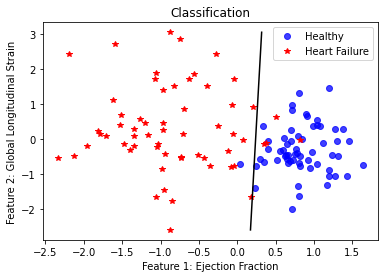

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot data
plt.plot(X[y==0,0],X[y==0,1],'bo',alpha=0.75,label = 'Healthy')
plt.plot(X[y==1,0],X[y==1,1],'r*',alpha=1,label = 'Heart Failure')

# Plot decision boundary
# Define y-coordinates
x2 = np.array([X[:,1].min(), X[:,1].max()])
# Define x-coordinates
x1 = -(w0 + w2*x2)/w1
# Plot 
plt.plot(x1, x2, "k-") 

plt.legend()
plt.title('Classification')
plt.xlabel('Feature 1: Ejection Fraction')
plt.ylabel('Feature 2: Global Longitudinal Strain')

### Exercise 2

Write a solution to a following problem: You would like find out whether using only Ejection Fraction (EF) would be suffiecient to predict the heart failure (HF). 

Write code to
* Create the new feature matrix and the target vector
* Fit the model and calculate the accuracy score
* Print the equation of the decision boundary

What is the drop in accuracy compared to using both features (EF and GLS)?

In [18]:
# create feature matrix containing EF only
X2 = scaler.fit_transform(data[:,0].reshape(-1,1))

# create label vector containing HF
y2 = data[:,2]

# Create the model
from sklearn.linear_model import Perceptron
model2 = Perceptron(eta0=0.2)

# Fit the model
model2.fit(X2,y2)

# Calculate accuracy
accuracy2 = model2.score(X2,y2)

# Print the score
print('Accuracy score is: ', round(accuracy2,2))

# Print the decision boundary
print('Decision boundary: {} {}x1 = 0'.format(round(model2.intercept_[0],2),round(model2.coef_[0][0],2)))

Accuracy score is:  0.94
Decision boundary: 0.0 -0.46x1 = 0


## Clustering
<img src="pictures/T1.png" width = "150" style="float: right;">

This example demonstrates the __clusterer__ object API.

The file 'T1.png' contains a slice of T1-weighted magnetic resonance image (MRI) of the adult brain. The non-brain tissues have been removed in pre-processing. We perform `KMeans` clustering to segment white matter (WM), grey matter (GM) and cerebro-spinal fluid (CSF) in this image. 


### Prepare the data
First we will load the image using the `matplotlib` function `imread` and display it. 

Image dimensions:  (256, 213)


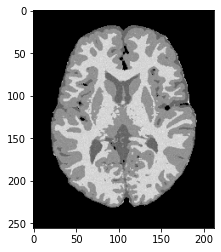

In [19]:
# load  image
T1 = plt.imread('datasets/T1.png')

# display image
plt.imshow(T1, cmap = 'gray')

# print shape
print('Image dimensions: ', T1.shape)

Next we need to convert the image into the feature matrix suitable for processing using `sklearn` functions. First we need to remove the background pixels that have values zero. Then we need to create the feature matrix as a 2D array object, but with only one feature in each row.

In [20]:
# Find all the non-zero elements
ind = T1>0
# Create the feature matrix with the correct dimensions
X = T1[ind].reshape(-1,1)
print('Shape of feature matrix X is ', X.shape)

Shape of feature matrix X is  (28596, 1)


### Create and fit the model

Now we are ready to perform k-means clustering into 3 classes, which will correspond to three brain tissues: WM, GM and CSF.

In [21]:
from sklearn.cluster import KMeans

# Create the model
model=KMeans(n_clusters=3, random_state = 42)
# Fit the model
model.fit(X)
# Fitted parametres
c = model.cluster_centers_
print(c.round(1).flatten())

[0.8 0.6 0.4]


### Predict the labels

The next step is the predict the labels. Note that this time we did not calculate any score - this is because we do not have the training labels, so cannot evaluate the performance.

In [22]:
# Predict the labels
y=model.predict(X)

### Plot the result
To plot the result, we need to reshape the predicted labels to the original 2D array and then we can display it as an image.

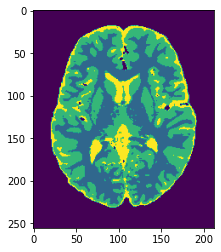

In [23]:
# Create empty segmentation image
segmentation = np.zeros(T1.shape)
# Paste the labels into correct locations
segmentation[ind] = y+1
# Plot the segmentation
plt.imshow(segmentation, cmap = 'viridis')

### Exercise 3

Now perform the k-means clustering for the T2-weighted image 'T2.png'. Is the result similar?

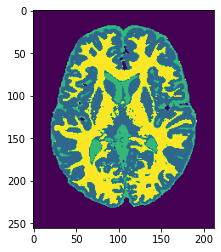

In [24]:
# load  image
T2 = plt.imread('datasets/T2.png')

# select non-zero pixels
ind2 = T2>0

# create feature matrix
X2 = T2[ind2].reshape(-1,1)

# Create the model

model2=KMeans(n_clusters=3)

# Fit the model
model2.fit(X2)

# Predict the labels
y2=model2.predict(X2)

# create segmentation image
segmentation2 = np.zeros(T2.shape)
# Paste the labels into correct locations
segmentation2[ind2] = y2+1


# Plot the segmentation
plt.imshow(segmentation2, cmap = 'viridis')

## Dimensionality reduction
<img src="pictures/malignant.gif" width = "150" style="float: right;">

This example demonstrates the __transformer__ object API.

The breast cancer dataset is in-built in `sklearn` and it contains 30 features - properties of cells extracted using biopsy and photographed under a microscope - and labels whether the tumour was malignant or benign.

We will reduce the dimensionality of the feature vectors to 2 to visualise the patterns in this high-dimensional dataset.


### Prepare the data

First we load the dataset and check it's structure

In [25]:
from sklearn import datasets

bc = datasets.load_breast_cancer()

print(bc.keys())
print('\n Features: \n', bc.feature_names)
print('\n Labels: ', bc.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

 Features: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

 Labels:  ['malignant' 'benign']


Now we extract the feature matrix and scale it using standard scaler

In [26]:
X=bc.data
print('We have {} features.'.format(X.shape[1]))

We have 30 features.


### Create the model

We will choose the principal component analysis with 2 dimensions.

In [27]:
from sklearn.decomposition import PCA
model = PCA(n_components = 2)

### Fit the model 

The model is fitted using function `fit`. 

In [28]:
model.fit(X)
pc1 = model.components_[0]
pc2 = model.components_[1]
print('Component 1: \n',np.around(pc1,1))
print('Component 2: \n',np.around(pc2,1))

Component 1: 
 [ 0.   0.   0.   0.5  0.   0.   0.   0.   0.  -0.   0.  -0.   0.   0.1
 -0.   0.   0.   0.  -0.  -0.   0.   0.   0.   0.9  0.   0.   0.   0.
  0.   0. ]
Component 2: 
 [ 0.  -0.   0.1  0.9 -0.  -0.   0.   0.  -0.  -0.  -0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  -0.  -0.  -0.  -0.5 -0.  -0.  -0.  -0.
 -0.  -0. ]


### Transform the features

Rather than predicting some outputs, PCA transforms the features using the function `transform`. We can check that transformed feature vectors are now 2-dimensional.

In [29]:
X_reduced = model.transform(X)
print('We have {} features.'.format(X_reduced.shape[1]))

We have 2 features.


### Plot the data

The code below visualises the projection of the breast cancer data on the first two principal components.

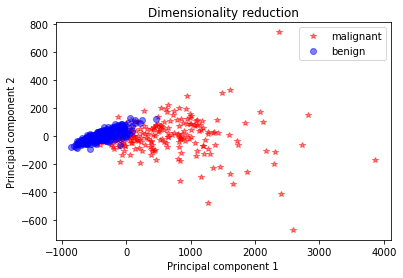

In [30]:
Labels = bc.target

plt.plot(X_reduced[:, 0][Labels==0], X_reduced[:, 1][Labels==0], "r*", alpha = 0.5, label = 'malignant')
plt.plot(X_reduced[:, 0][Labels==1], X_reduced[:, 1][Labels==1], "bo", alpha = 0.5, label = 'benign')

plt.title('Dimensionality reduction')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend()


### Exercise 4

Compare performance of a `Perceptron` classifier to detect breast cancer using the original and reduced features.

First we will load the dataset and extract the feature matrix and label vector.

In [31]:
from sklearn import datasets

# Load the data
bc = datasets.load_breast_cancer()

# Original dataset - feature matrix and label vector
X=bc.data
y=bc.target

The next step is to apply PCA to the feature matrix and check that the reduced matrix has only two features.

In [32]:
from sklearn.decomposition import PCA

# Create PCA model with 2 components
model = PCA(n_components=2)

# Fit the model
model.fit(X)

# Transform the feature matrix to 2-dimensional space
X_reduced = model.transform(X)

# Print number of features
print('We have {} features.'.format(X_reduced.shape[1]))

We have 2 features.


Let's now compared the accuracy of classification using `Perceptron` when fitting to the original feature matrix `X` or reduced feature matrix `X_reduced`. Note that labels vector `y` is the same in both cases.

In [33]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

# Create Perceptron model
clf = Perceptron()

# Fit model using the original dataset
clf.fit(scaler.fit_transform(X),y)

# Calculate accuracy using the original dataset
acc_orig = clf.score(scaler.fit_transform(X),y)
print('Original dataset accuracy: ',round(acc_orig,2))

# Fit model using the reduced dataset
clf.fit(scaler.fit_transform(X_reduced),y)

# Calculate accuracy using the reduced dataset
acc_reduced = clf.score(scaler.fit_transform(X_reduced),y)
print('Reduced dataset accuracy: ',round(acc_reduced,2))

Original dataset accuracy:  0.98
Reduced dataset accuracy:  0.92
